In [1]:
from google.colab import drive
drive.mount('/content/drive') 

Mounted at /content/drive


In [2]:
!pip install tensorflowjs

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 77 kB 2.9 MB/s 
     |████████████████████████████████| 40 kB 6.9 MB/s 
  Attempting uninstall: packaging
    Found existing installation: packaging 21.3
    Uninstalling packaging-21.3:
      Successfully uninstalled packaging-21.3
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
datascience 0.10.6 requires folium==0.2.1, but you have folium 0.8.3 which is incompatible.


In [3]:
# Imports
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

import os
import tqdm
import cv2

import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.applications import EfficientNetB0
from tensorflow.keras.applications import EfficientNetB3    # Too much RAM
from tensorflow.keras.layers import Dense, Dropout, Activation, Flatten, Conv2D, MaxPooling2D
import tensorflowjs as tfjs

In [4]:
# Source directories

source_dir='/content/drive/MyDrive/Colab Notebooks/Data/Brain-Tumor-Classification-DataSet-master'

train_dir='/content/drive/MyDrive/Colab Notebooks/Data/Brain-Tumor-Classification-DataSet-master/Training'
test_dir='/content/drive/MyDrive/Colab Notebooks/Data/Brain-Tumor-Classification-DataSet-master/Testing'

In [5]:
# Our output classes

classes = sorted(os.listdir(train_dir))
    
num_classes = len(classes)

class_map = {
    'no_tumor': 0,
    'glioma_tumor': 1,
    'meningioma_tumor': 2,
    'pituitary_tumor': 3
}

print(classes)

['glioma_tumor', 'meningioma_tumor', 'no_tumor', 'pituitary_tumor']


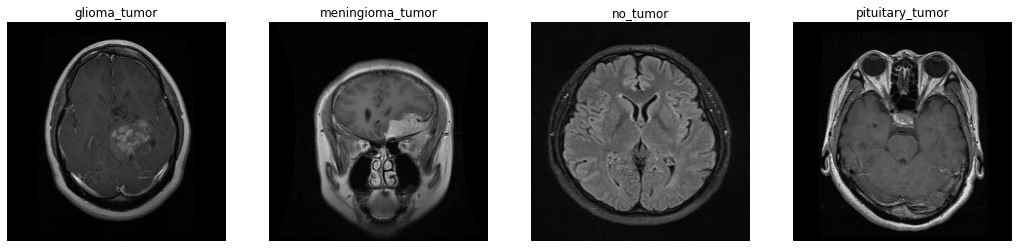

In [6]:
# First, let's visualize the kind of image data we have in our dataset

length, width = 225, 225

example_images = ['/content/drive/MyDrive/Colab Notebooks/Data/Brain-Tumor-Classification-DataSet-master/Training/glioma_tumor/gg (1).jpg',
                 '/content/drive/MyDrive/Colab Notebooks/Data/Brain-Tumor-Classification-DataSet-master/Training/meningioma_tumor/m (10).jpg',
                 '/content/drive/MyDrive/Colab Notebooks/Data/Brain-Tumor-Classification-DataSet-master/Training/no_tumor/7.jpg',
                 '/content/drive/MyDrive/Colab Notebooks/Data/Brain-Tumor-Classification-DataSet-master/Training/pituitary_tumor/p (1).jpg']

fig = plt.figure(figsize=(8, 8))
columns = 4

for i in range(4):
    img = mpimg.imread(example_images[i])
    img = cv2.resize(img, (width, length))
    fig.add_subplot(1, columns, i+1)
    plt.imshow(img)
    plt.gcf().set_size_inches(18, 18)
    plt.axis(False)
    plt.title(classes[i])
    
plt.show()

In [7]:
# Creating arrays for training

images = []
labels = []

for label in classes:
    fPath = os.path.join('/content/drive/MyDrive/Colab Notebooks/Data/Brain-Tumor-Classification-DataSet-master/Training', label)
    for item in os.listdir(fPath):
        img = cv2.imread(os.path.join(fPath, item))
        img = cv2.resize(img,(length, width))
        img = img.astype('float')
        images.append(img)
        labels.append(class_map[label])

x_train = np.array(images)
y_train = np.array(labels)

# Creating arrays for testing

test_images = []
test_labels = []

for label in classes:
    fPath = os.path.join('/content/drive/MyDrive/Colab Notebooks/Data/Brain-Tumor-Classification-DataSet-master/Testing', label)
    for item in os.listdir(fPath):
        img = cv2.imread(os.path.join(fPath, item))
        img = cv2.resize(img,(length, width)) # All items (train and test) have the same pixel density
        img = img.astype('float')
        test_images.append(img)
        test_labels.append(class_map[label])
        
x_test = np.array(test_images)
y_test = np.array(test_labels)


In [8]:
print(x_train.shape)
print(y_train.shape)

(2870, 225, 225, 3)
(2870,)


In [9]:
# Defining our CNN

model = tf.keras.models.Sequential([

            tf.keras.layers.Conv2D(64, kernel_size = [3,3], padding = 'same', activation = 'relu', input_shape = x_train.shape[1:]),
            tf.keras.layers.MaxPool2D(pool_size = [3,3]),
            tf.keras.layers.Conv2D(128, kernel_size = [3,3], padding = 'same', activation = 'relu'),
            tf.keras.layers.MaxPooling2D(3,3),
            tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
            tf.keras.layers.MaxPooling2D(2,2), 
            tf.keras.layers.Conv2D(32, (3,3), activation='relu'), 
            tf.keras.layers.MaxPooling2D(2,2),
            tf.keras.layers.Dense(1024, activation = 'relu'),
            tf.keras.layers.Dense(512, activation = 'relu'),
            tf.keras.layers.Flatten(),
            tf.keras.layers.Dense(256, activation='relu'), 
            tf.keras.layers.Dense(64, activation='relu'), 
            tf.keras.layers.Dense(4, activation='softmax')  
            
])

print(model.summary())

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 225, 225, 64)      1792      
                                                                 
 max_pooling2d (MaxPooling2D  (None, 75, 75, 64)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 75, 75, 128)       73856     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 25, 25, 128)      0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 23, 23, 64)        73792     
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 11, 11, 64)       0

In [ ]:
# Old model without transfer learning - bad overfitting

model.compile(optimizer = optim, loss = loss, metrics = metrics)

model.fit(x_train, y_train, epochs = epochs, batch_size = batch_size, verbose = 2)

model.evaluate(x_test, y_test, batch_size = batch_size, verbose = 2)


NameError: ignored

In [10]:
# Our hyperparameters

lr = 0.0001
batch_size = 90
epochs = 8

loss = tf.keras.losses.SparseCategoricalCrossentropy(from_logits = True)
optim = tf.keras.optimizers.Adam(learning_rate = lr)
metrics = ['accuracy']

In [11]:
effnet = EfficientNetB0(weights='imagenet',include_top=False,input_shape=(length, width,3))

16719872/16705208 [==============================] - 0s 0us/step


In [12]:
model_eff = effnet.output
model_eff = tf.keras.layers.GlobalAveragePooling2D()(model_eff)
model_eff = tf.keras.layers.Dropout(rate=0.5)(model_eff)
model_eff = tf.keras.layers.Dense(4,activation='softmax')(model_eff)
model_eff = tf.keras.models.Model(inputs=effnet.input, outputs = model_eff)

print(model_eff.summary())

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, 225, 225, 3  0           []                               
                                )]                                                                
                                                                                                  
 rescaling (Rescaling)          (None, 225, 225, 3)  0           ['input_1[0][0]']                
                                                                                                  
 normalization (Normalization)  (None, 225, 225, 3)  7           ['rescaling[0][0]']              
                                                                                                  
 stem_conv_pad (ZeroPadding2D)  (None, 227, 227, 3)  0           ['normalization[0][0]']      

In [13]:
# Thank you Colab GPU for this runtime

model_eff.compile(optimizer = optim, loss = loss, metrics = metrics)

model_eff.fit(x_train, y_train, epochs = epochs, batch_size = batch_size, verbose = 2)

Epoch 1/8


/usr/local/lib/python3.7/dist-packages/tensorflow/python/util/dispatch.py:1082: UserWarning: "`sparse_categorical_crossentropy` received `from_logits=True`, but the `output` argument was produced by a sigmoid or softmax activation and thus does not represent logits. Was this intended?"
  return dispatch_target(*args, **kwargs)


32/32 - 39s - loss: 0.9191 - accuracy: 0.6592 - 39s/epoch - 1s/step
Epoch 2/8
32/32 - 19s - loss: 0.3577 - accuracy: 0.8902 - 19s/epoch - 602ms/step
Epoch 3/8
32/32 - 19s - loss: 0.2063 - accuracy: 0.9352 - 19s/epoch - 600ms/step
Epoch 4/8
32/32 - 19s - loss: 0.1195 - accuracy: 0.9610 - 19s/epoch - 603ms/step
Epoch 5/8
32/32 - 19s - loss: 0.0703 - accuracy: 0.9840 - 19s/epoch - 604ms/step
Epoch 6/8
32/32 - 19s - loss: 0.0453 - accuracy: 0.9864 - 19s/epoch - 606ms/step
Epoch 7/8
32/32 - 19s - loss: 0.0399 - accuracy: 0.9892 - 19s/epoch - 601ms/step
Epoch 8/8
32/32 - 19s - loss: 0.0343 - accuracy: 0.9902 - 19s/epoch - 597ms/step


In [14]:
model_path = '/content/drive/MyDrive/brain/brain'
model_path_js = '/content/drive/MyDrive/brain/brainjs'
model_eff.save(model_path+".h5")
tfjs.converters.save_keras_model(model_eff, model_path_js)

weight normalization/count with shape () and dtype int64 was auto converted to the type int32
